# Salary Dataset - Simple linear regression

In [31]:
#Libs 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [32]:
#Import data 
df = pd.read_csv('Salary_dataset.csv')

In [33]:
#Dataframe
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [34]:
#Dropando coluna 'Unnamed:0'
df.drop(columns=['Unnamed: 0'], inplace= True)

In [35]:
#Infos gerais 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [36]:
#Infos estatísticas 
df.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [37]:
#Verificando nulos 
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [38]:
#Verificando duplicados
df.duplicated().sum()

np.int64(0)

In [39]:
#Correlação 
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


**Salário X Anos de experiência**

Text(0, 0.5, 'Anos de experiência')

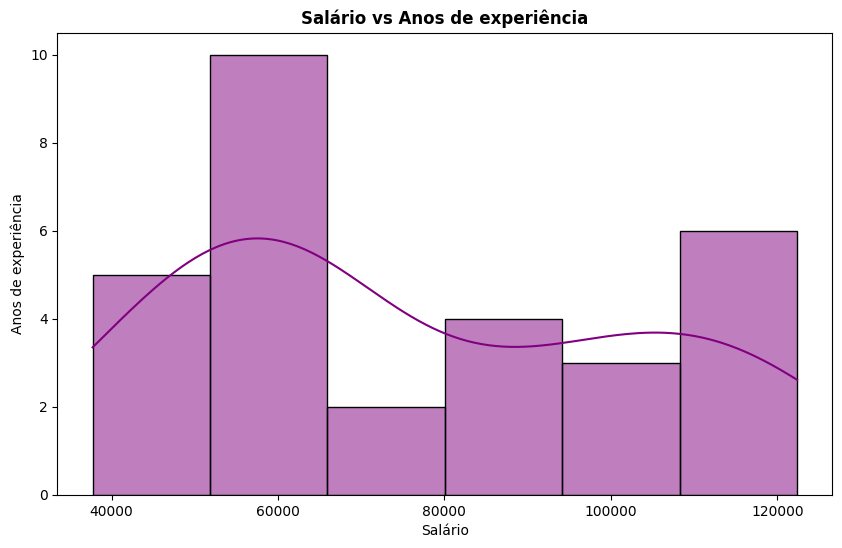

In [100]:
#Padronizando tamanhos 
plt.rcParams['figure.figsize'] = [10,6]

#Histograma saláro X experiência
sns.histplot(df['Salary'], kde= True, color= 'purple')

#Titulos e eixos 
plt.title('Salário vs Anos de experiência', fontweight = 'bold')
plt.xlabel('Salário')
plt.ylabel('Anos de experiência')


Text(0, 0.5, 'Salário')

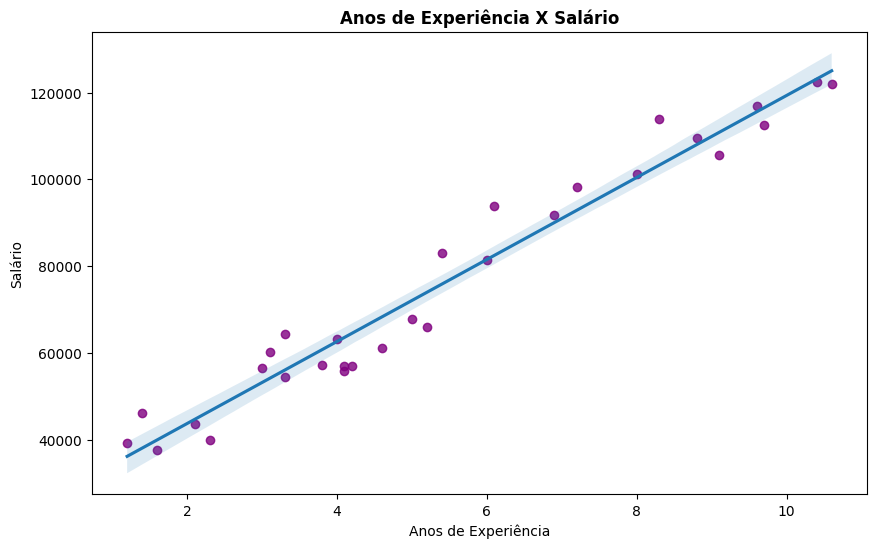

In [98]:
#Linha de regressão 
sns.regplot(df, x = df['YearsExperience'], y = df['Salary'], scatter_kws= {'color' : 'purple'})

#Configurando titulos e eixos 
plt.title('Anos de Experiência X Salário', fontweight='bold', loc='center')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')

**Análise**: 
- Podemos ver que temos uma linha de regressão e a variável Salary é explicada pela variável YearsExperience;
- Quanto mais anos de experiencia, maior o salário.

In [82]:
#Deninindo X e y 
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Modelling

In [76]:
#Libs 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


In [77]:
#Train e test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42 )


In [78]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [79]:
#Predict 
y_pred = lr.predict(X_test)


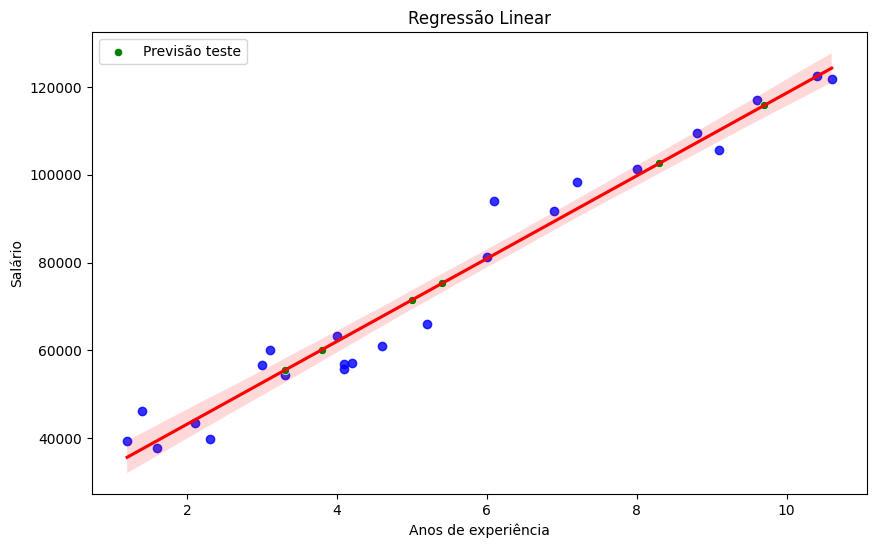

In [99]:
#Visualização com sns
fig = plt.figure(figsize=(10,6))
sns.regplot(x = X_train.values.flatten(), y= y_train, scatter_kws= {'color' : 'blue'}, line_kws= {'color' : 'red'})

#Add previsão
sns.scatterplot(x = X_test.values.flatten(), y= y_pred, color = 'green', label = 'Previsão teste')

#Rotulos e titulos 
plt.title('Regressão Linear')
plt.xlabel('Anos de experiência')
plt.ylabel('Salário')
plt.show()

## Metrics

In [96]:
#Libs
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Métricas e score
print('R²:', lr.score(X_train,y_train) )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))

R²: 0.9645401573418148
MAE: 6286.453830757745
MSE: 49830096.855908334
RMSE: 7059.043621901506
